1. Are those with children more likely to feel stress than adults without dependences?
2. How does the number of dependencies and their age group affect stress levels in parents/head of household (HoH)?
3. Do stress levels differ between male and female population?
4. Do stress levels differ between male and female parents?


PHQ4_1-4 - Patient health questionnaire, response scale of 1-4 for frequency
1. Little interest or pleasure in doing things
2. Feeling down, depressed, or hopeless
3. Feeling nervous, anxious, or on edge
4. Not being able to stop or control worrying

child_age_1-5 - Number of children within the 5 age groups
1. 0-2
2. 3-11
3. 12-18
4. 19+
5. N/A


In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
ucl_data = pd.read_csv('cov19tracker_cleaned.csv')

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
ucl_data.head()

,index_n,state,year-month,endtime,gender,age,household_size,household_children,child_age_1,child_age_2,...,w4_2,w4_3,w4_4,w4_5,w4_6,w4_7,w4_8,w4_9,w4_10,w4_11
0,0,California,2020-02-01,02/04/2020 08:11,Female,33.0,5,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Pennsylvania,2020-02-01,02/04/2020 08:12,Male,38.0,4,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Florida,2020-02-01,02/04/2020 08:15,Female,48.0,2,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,California,2020-02-01,02/04/2020 08:15,Male,31.0,5,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Florida,2020-02-01,02/04/2020 08:15,Female,69.0,2,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
ucl_data.shape

(65860, 39)

In [47]:
stress_df = pd.DataFrame(ucl_data['PHQ4_1']).dropna(axis=0)

In [48]:
stress_df.value_counts()

PHQ4_1                 
                           13563
Not at all                  9322
Several days                5072
More than half the days     2502
Nearly every day            1949
Prefer not to say            522
dtype: int64

In [49]:
counts_df = stress_df.value_counts().rename_axis('unique_values').reset_index(name="counts")

In [50]:
counts_df

,unique_values,counts
0,,13563
1,Not at all,9322
2,Several days,5072
3,More than half the days,2502
4,Nearly every day,1949
5,Prefer not to say,522


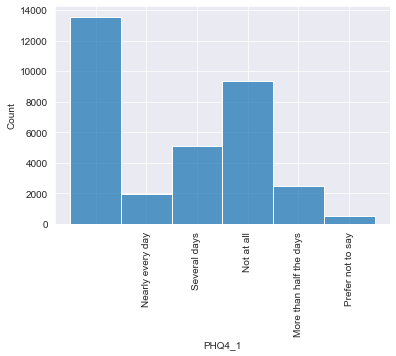

In [51]:
sns.set_style("darkgrid")
sns.histplot(x='PHQ4_1', data=stress_df)
plt.xticks(rotation=90);